<a href="https://colab.research.google.com/github/nourankh1/heart-failure-prediction/blob/main/DS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. Setup: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files

In [ ]:
# 1) a. Load the Dataset
df = pd.read_csv('/content/archive.zip')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# 1) b. Data Exploration
print("\nDataset Info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.

In [ ]:
# a) 2. Feature Scaling: Standardize or normalize the features (e.g., income and spending score) to prevent scale differences from biasing the model.
# Encode Gender: Male = 0, Female = 1
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

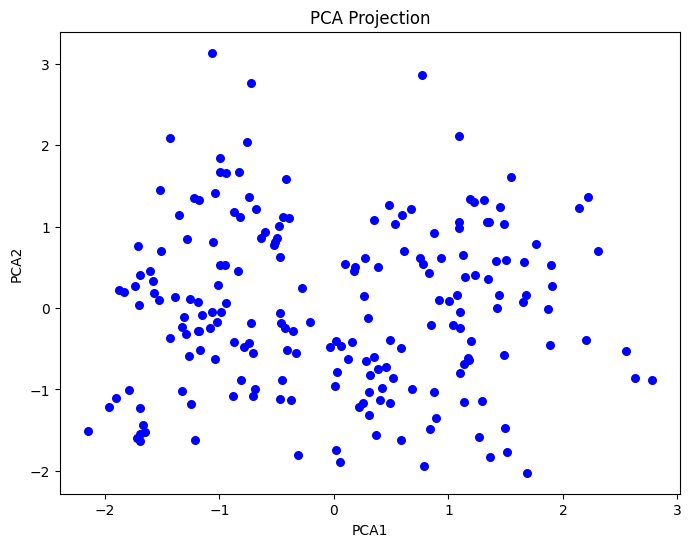


total variability in data in %:
[33.69004557 26.23064463]


In [ ]:
# b) Dimensionality Reduction and Data Visualization: Use PCA to reduce the dataset to 2dimensions for visualization purposes.
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=30)
plt.title('PCA Projection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print("\ntotal variability in data in %:")
print(pca.explained_variance_ratio_*100)

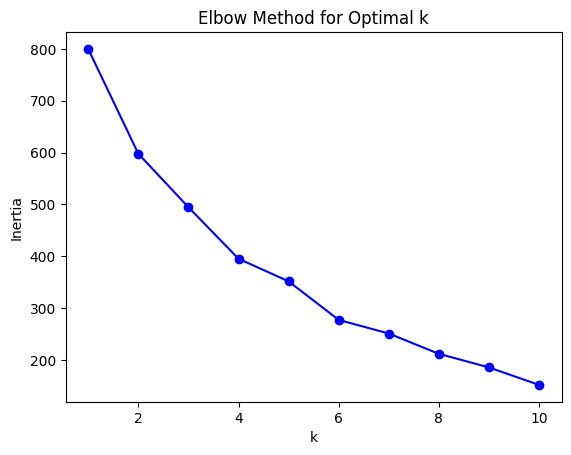

In [ ]:
# ---  c) Determining the Optimal Number of Clusters: Use the elbow method to determine the
 #optimal number of clusters for K-means. Plot the inertia for a range of k values and identify the
 #elbow point.

distance = []
K_range = range(1, 11) #Defining a range of cluster numbers to test (from 1 to 10)
for k in K_range:
   # to create a KMeans clustering model specifying k clusters.
    kmeans = KMeans(n_clusters=k, random_state=42) # random_state=42 ensures same results every time you run
    kmeans.fit(scaled_features) # Running KMeans clustering on data
     #(KMeans calculates the Euclidean distance between each point and every cluster center, then assigns the point to the cluster whose center is closest (smallest distance).)
    distance.append(kmeans.inertia_) #Append inertia (sum of squared distances) to list

plt.plot(K_range, distance, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Based on the elbow plot, we choosed k = 6 as after it, adding more clusters doesn't improve things much.
optimal_k = 6

In [ ]:
# Step 1: Initialize KMeans with 6 clusters

# 6. K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [ ]:
# Agglomerative Clustering with k=6
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(scaled_features)


In [ ]:
 #GMM with k=6
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

In [ ]:
# BIRCH with k=6
birch = Birch(n_clusters=optimal_k)
birch_labels = birch.fit_predict(scaled_features)

In [ ]:
# 10. Evaluation Function
def evaluate_clustering(name, labels):
    sil = silhouette_score(scaled_features, labels)
    db = davies_bouldin_score(scaled_features, labels)
    print(f'{name}: Silhouette Score = {sil:.3f}, Davies-Bouldin Index ={db:.3f}')

In [ ]:
# 11. Evaluate All Models
evaluate_clustering('K-Means', kmeans_labels)
evaluate_clustering('Agglomerative', agglo_labels)
evaluate_clustering('GMM', gmm_labels)
evaluate_clustering('BIRCH',birch_labels)

K-Means: Silhouette Score = 0.335, Davies-Bouldin Index =1.014
Agglomerative: Silhouette Score = 0.310, Davies-Bouldin Index =1.073
GMM: Silhouette Score = 0.307, Davies-Bouldin Index =1.047
BIRCH: Silhouette Score = 0.315, Davies-Bouldin Index =1.091


==> K-Means
Pros: Fast, efficient, works well with spherical clusters.

Cons: Sensitive to outliers, assumes equal cluster size and shape.

Usefulness here: Performs well with compact clusters (which is the case in many customer segmentation tasks).

==> Agglomerative Clustering
Pros: Doesn't assume cluster shape; builds a hierarchy.

Cons: Computationally more expensive; less scalable.

Usefulness here: Can capture more complex boundaries between clusters, but may struggle with large data.

==> Gaussian Mixture Model (GMM)
Pros: Probabilistic; allows soft clustering; handles elliptical clusters.

Cons: More complex; assumes data follows Gaussian distribution.

Usefulness here: Useful if data has overlapping or non-spherical clusters. Can reveal subtle group differences.

==> BIRCH
Pros: Scalable for large datasets; hierarchical; efficient.

Cons: May be less accurate with small datasets; sensitive to threshold parameters.

Usefulness here: Best for large-scale clustering, might underperform on small to medium datasets.

==> K-Means is the best choice for this dataset because:

1)Because it has the highest Silhouette Score = 0.335 and the lowest Davies-Bouldin Index =1.014.

2)It’s fast, simple, and easy to interpret.

In [ ]:
# 12. Visualization Function
def plot_clusters(title, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

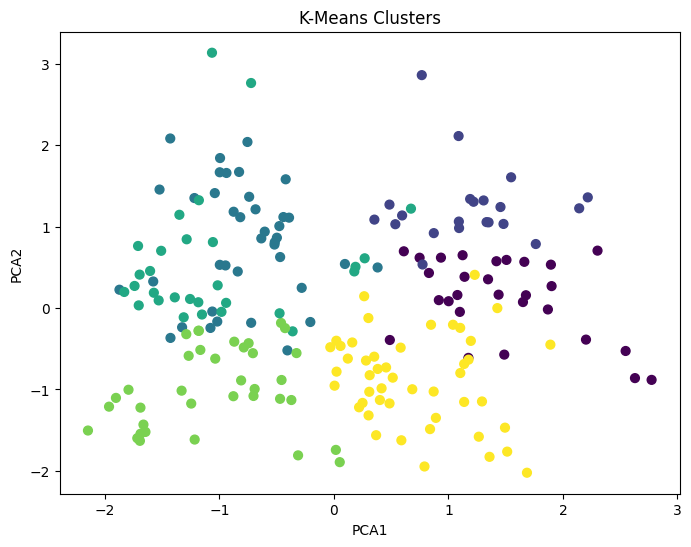

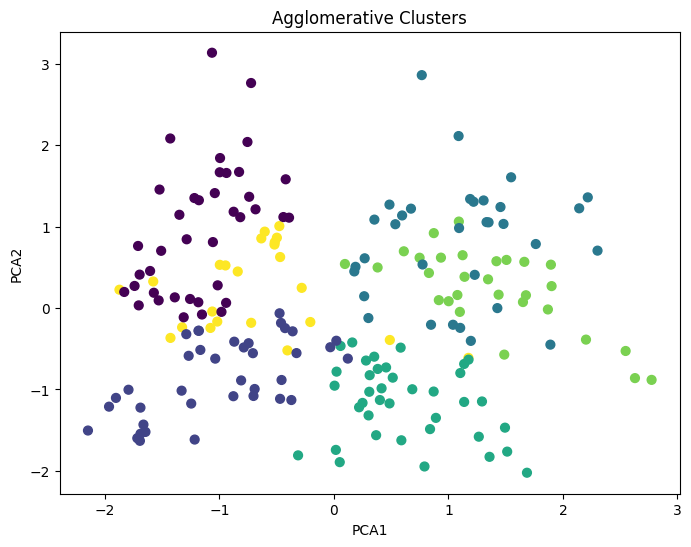

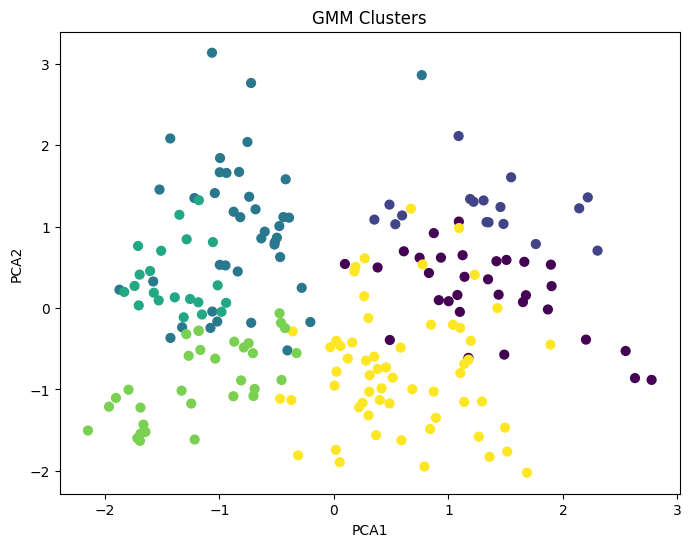

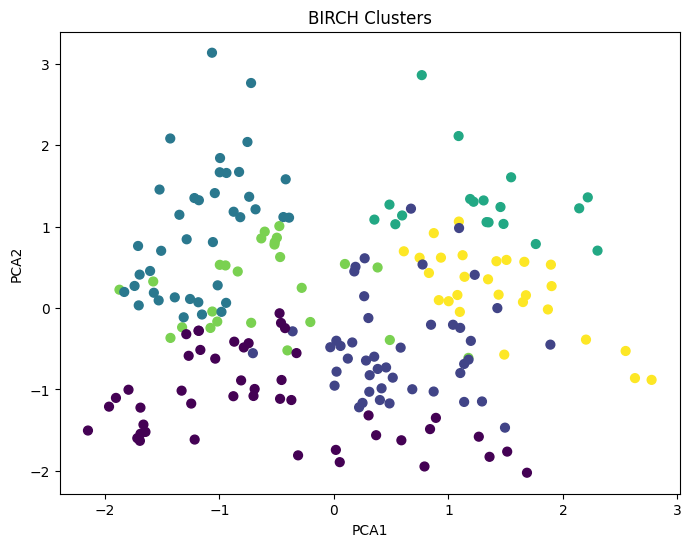

In [ ]:
# 13. Visualize Clusters
plot_clusters('K-Means Clusters', kmeans_labels)
plot_clusters('Agglomerative Clusters', agglo_labels)
plot_clusters('GMM Clusters', gmm_labels)
plot_clusters('BIRCH Clusters',birch_labels)

In [ ]:
# 14. Add cluster labels to the main dataframe (for K-Means as an example)
df['KMeans_Cluster'] = kmeans_labels

# 15. Cluster Profiling: Get average characteristics per cluster
cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Customer Profiles Based on K-Means Clusters:\n")
print(cluster_profiles)

# 16. Count of customers in each cluster
print("\nNumber of customers in each cluster:")
print(df['KMeans_Cluster'].value_counts())

Customer Profiles Based on K-Means Clusters:

                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               57.214286           46.785714               38.714286
1               39.000000           88.333333               14.428571
2               28.410256           58.230769               70.717949
3               33.206897           91.034483               72.137931
4               25.888889           41.277778               57.944444
5               49.914894           54.255319               36.531915

Number of customers in each cluster:
KMeans_Cluster
5    47
2    39
4    36
3    29
0    28
1    21
Name: count, dtype: int64


In [ ]:
# Add cluster labels to the DataFrame
df['GMM_Cluster'] = gmm_labels

# GMM Cluster Profiling
print("Customer Profiles Based on GMM:\n")
gmm_profiles = df.groupby('GMM_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(gmm_profiles)

print("\nNumber of customers in each GMM cluster:")
print(df['GMM_Cluster'].value_counts())





Customer Profiles Based on GMM:

                   Age  Annual Income (k$)  Spending Score (1-100)
GMM_Cluster                                                       
0            55.225806           48.225806               40.225806
1            39.235294           83.411765               11.294118
2            28.100000           64.075000               70.750000
3            32.190476           86.047619               81.666667
4            25.437500           44.625000               61.281250
5            47.067797           57.644068               35.508475

Number of customers in each GMM cluster:
GMM_Cluster
5    59
2    40
4    32
0    31
3    21
1    17
Name: count, dtype: int64


In [ ]:
# BIRCH Cluster Profiling
df['BIRCH_Cluster'] = birch_labels

print("\nCustomer Profiles Based on BIRCH:\n")
birch_profiles = df.groupby('BIRCH_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(birch_profiles)

print("\nNumber of customers in each BIRCH cluster:")
print(df['BIRCH_Cluster'].value_counts())



Customer Profiles Based on BIRCH:

                     Age  Annual Income (k$)  Spending Score (1-100)
BIRCH_Cluster                                                       
0              30.000000           39.021739               49.000000
1              49.133333           67.422222               40.044444
2              32.692308           86.538462               82.128205
3              38.833333           86.388889               11.666667
4              25.720000           40.400000               59.000000
5              57.851852           49.740741               40.592593

Number of customers in each BIRCH cluster:
BIRCH_Cluster
0    46
1    45
2    39
5    27
4    25
3    18
Name: count, dtype: int64


In [ ]:
df['Agglo_Cluster'] = agglo_labels

# Agglomerative Cluster Profiling
print("\nCustomer Profiles Based on Agglomerative Clustering:\n")
agglo_profiles = df.groupby('Agglo_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(agglo_profiles)

print("\nNumber of customers in each Agglomerative cluster:")
print(df['Agglo_Cluster'].value_counts())


Customer Profiles Based on Agglomerative Clustering:

                     Age  Annual Income (k$)  Spending Score (1-100)
Agglo_Cluster                                                       
0              32.692308           86.538462               82.128205
1              27.105263           46.526316               58.552632
2              41.454545           89.090909               16.181818
3              49.789474           44.105263               39.657895
4              56.551724           50.034483               41.344828
5              24.565217           39.217391               59.652174

Number of customers in each Agglomerative cluster:
Agglo_Cluster
0    39
3    38
1    38
2    33
4    29
5    23
Name: count, dtype: int64


Each clustering algorithm segmented customers into distinct profiles based on age, annual income, and spending behavior:

K-Means identified six well-balanced groups. For example, Cluster 2 consists of younger customers (avg. age - 28) with moderate income and high spending ( -71), suggesting they are active spenders. Cluster 1 includes older, high-income but low-spending individuals (~88k income, 14 spending score), indicating a more conservative segment.

Agglomerative Clustering produced similar profiles, with Cluster 0 highlighting high-income, high-spending customers, and Cluster 2 grouping affluent but low-spending individuals. This method grouped customers by both lifestyle and income behavior.

BIRCH results overlapped with other methods, especially with Cluster 2 (affluent, high-spending). However, some clusters like Cluster 3 (high income but very low spending) appeared more distinctly here, showing BIRCH's ability to identify niche segments.

GMM provided more flexibility in capturing overlap among clusters. It revealed a clear high-spending group (Cluster 3: ~86k income, ~81 spending) and a young, moderate-income, high-spending segment (Cluster 2), useful for targeted marketing.

Overall, K-Means provided clear, well-balanced clusters suitable for broad marketing strategies, while BIRCH and GMM offered nuanced insights into niche and overlapping customer segments, allowing for more tailored approaches."